치매/일반인 뇌 분류 - 데이터 생성 활용

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!git clone https://github.com/taehojo/data-ch20.git

Cloning into 'data-ch20'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 265 (delta 0), reused 265 (delta 0), pack-reused 0
Receiving objects: 100% (265/265), 1.86 MiB | 22.97 MiB/s, done.


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

train_generator = train_datagen.flow_from_directory(
    './data-ch20/train',
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    './data-ch20/test',
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    validation_steps=10,
    callbacks=[early_stopping_callback])

Epoch 1/100
32/32 [==============================] - 7s 187ms/step - loss: 0.6999 - accuracy: 0.5437 - val_loss: 0.6890 - val_accuracy: 0.5400
Epoch 2/100
32/32 [==============================] - 6s 189ms/step - loss: 0.6898 - accuracy: 0.5312 - val_loss: 0.6868 - val_accuracy: 0.5200
Epoch 3/100
32/32 [==============================] - 6s 189ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6743 - val_accuracy: 0.5400
Epoch 4/100
32/32 [==============================] - 6s 192ms/step - loss: 0.6896 - accuracy: 0.5625 - val_loss: 0.6718 - val_accuracy: 0.5800
Epoch 5/100
32/32 [==============================] - 6s 186ms/step - loss: 0.6743 - accuracy: 0.6438 - val_loss: 0.6747 - val_accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 6s 187ms/step - loss: 0.6569 - accuracy: 0.6625 - val_loss: 0.6837 - val_accuracy: 0.4400
Epoch 7/100
32/32 [==============================] - 8s 239ms/step - loss: 0.6510 - accuracy: 0.6313 - val_loss: 0.7085 - val_accuracy: 0.4600

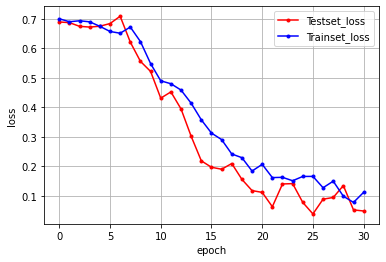

In [7]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss'] 

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

전이학습

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics 
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [16]:
!git clone https://github.com/taehojo/data-ch20.git

fatal: destination path 'data-ch20' already exists and is not an empty directory.


In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,         
                                  horizontal_flip=True,    
                                  width_shift_range=0.1,    
                                  height_shift_range=0.1)      

train_generator = train_datagen.flow_from_directory(
       './data-ch20/train',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
       './data-ch20/test',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [19]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [20]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                524352    
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
 activation_8 (Activation)   (None, 1)                

In [21]:
finetune_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = finetune_model.fit(
       train_generator,
       epochs=20,
       validation_data=test_generator,
       validation_steps=10, 
       callbacks=[early_stopping_callback])

Epoch 1/20
32/32 [==============================] - 48s 1s/step - loss: 0.7018 - accuracy: 0.6062 - val_loss: 0.5508 - val_accuracy: 0.8000
Epoch 2/20
32/32 [==============================] - 47s 1s/step - loss: 0.5460 - accuracy: 0.7063 - val_loss: 0.5759 - val_accuracy: 0.5800
Epoch 3/20
32/32 [==============================] - 47s 1s/step - loss: 0.4456 - accuracy: 0.8313 - val_loss: 0.4386 - val_accuracy: 0.8600
Epoch 4/20
32/32 [==============================] - 47s 1s/step - loss: 0.4278 - accuracy: 0.8438 - val_loss: 0.3676 - val_accuracy: 0.8800
Epoch 5/20
32/32 [==============================] - 47s 1s/step - loss: 0.3568 - accuracy: 0.8687 - val_loss: 0.3115 - val_accuracy: 0.9200
Epoch 6/20
32/32 [==============================] - 47s 1s/step - loss: 0.2948 - accuracy: 0.9000 - val_loss: 0.3038 - val_accuracy: 0.9200
Epoch 7/20
32/32 [==============================] - 47s 1s/step - loss: 0.3177 - accuracy: 0.8875 - val_loss: 0.3044 - val_accuracy: 0.9000
Epoch 8/20
32/32 [==

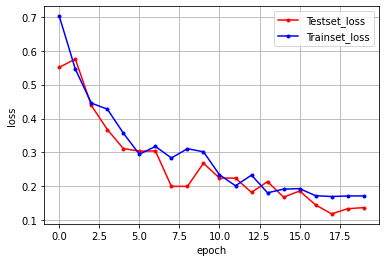

In [22]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()